<a href="https://colab.research.google.com/github/joowanhan/NLP_Lab_2025/blob/main/%5BNLP%5D_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing Text Data
## Load relevent Packages

In [1]:
# Import spacy
import spacy

# Loading NLTK module
import nltk

# NLTK에서 문장 토큰화(punkt), 불용어(stopwords), WordNet(어휘 데이터), 품사 태깅(averaged_perceptron_tagger) 등을 다운로드하여 사용할 준비.

# downloading punkt
nltk.download('punkt_tab')

# downloading stopwords
nltk.download('stopwords')

# downloading omw-1.4
nltk.download('omw-1.4')

# downloading wordnet
nltk.download('wordnet')

# downloading average_perception_tagger
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

## Tokenization

### NLTK를 사용한 문장 토큰화
nltk.tokenize.sent_tokenize를 사용하여 문단을 문장 단위로 나눔.   
입력 문단(paragraph)을 문장 단위 리스트로 변환.

In [2]:
# Sentence Tokenization
from nltk.tokenize import sent_tokenize

paragraph="""Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

# nltk.tokenize.sent_tokenize를 사용하여 문단을 문장 단위로 나눔.

tokenized_sentences=sent_tokenize(paragraph)
print(tokenized_sentences)

['Taj Mahal is one of the beautiful monuments.', 'It is one of the wonders of the world.', 'It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal.']


### spaCy를 사용한 문장 토큰화

spacy.load("en_core_web_sm")를 통해 영어 모델을 로드.   
sentencizer를 추가하여 문장 분할 기능을 활성화.   
nlp(paragraph)를 수행하여 문장별로 나눔.   
결과: 위의 NLTK 결과와 유사한 문장 리스트를 얻을 수 있음.

In [3]:
# Loading english language model(small model)
nlp = spacy.load("en_core_web_sm")

# Append the sentencizer pipe to the nlp pipeline
nlp.add_pipe('sentencizer')

paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

# Create nlp Object to handle linguistic annotations in a documents.
nlp_doc = nlp(paragraph)

# Generate list of tokenized sentence
tokenized_sentences = []
for sentence in nlp_doc.sents:
    tokenized_sentences.append(sentence.text)
print(tokenized_sentences)

['Taj Mahal is one of the beautiful monuments.', 'It is one of the wonders of the world.', 'It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal.']


### NLTK를 사용한 단어 토큰화 (Word Tokenization)
nltk.tokenize.word_tokenize는 문장을 단어 단위로 분리하는 기능을 함.   
paragraph 문자열을 단어(토큰) 단위로 나눠서 리스트 형태로 저장.   
단어뿐만 아니라 마침표(.)도 하나의 토큰으로 인식됨.   
영어에서 'isn't' 같은 단어는 ["is", "n't"]로 분리됨.   
기본적으로 공백을 기준으로 하지 않고, 문장부호까지 포함하여 단어를 분리하는 기능을 함.   

In [4]:
# Import nltk word_tokenize method
from nltk.tokenize import word_tokenize

# Split paragraph into words
tokenized_words=word_tokenize(paragraph)
print(tokenized_words)

['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


### spaCy를 사용한 단어 토큰화 (Word Tokenization)
spacy.load("en_core_web_sm") → 영어 모델(en_core_web_sm)을 로드.   
nlp(paragraph) → 입력 문장을 spaCy의 NLP 객체로 변환.   
for token in my_doc: → my_doc 객체에서 각 단어(토큰)를 반복하면서 리스트에 추가.   
단어뿐만 아니라 마침표(.)도 개별 토큰으로 분리됨.   
숫자(1631)도 하나의 토큰으로 인식됨.

In [5]:
# Loading english language model
nlp = spacy.load("en_core_web_sm")

paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

# Create nlp Object to handle linguistic annotations in a documents.
my_doc = nlp(paragraph)

# tokenize paragraph into words
tokenized_words = []
for token in my_doc:
    tokenized_words.append(token.text)
print(tokenized_words)

['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


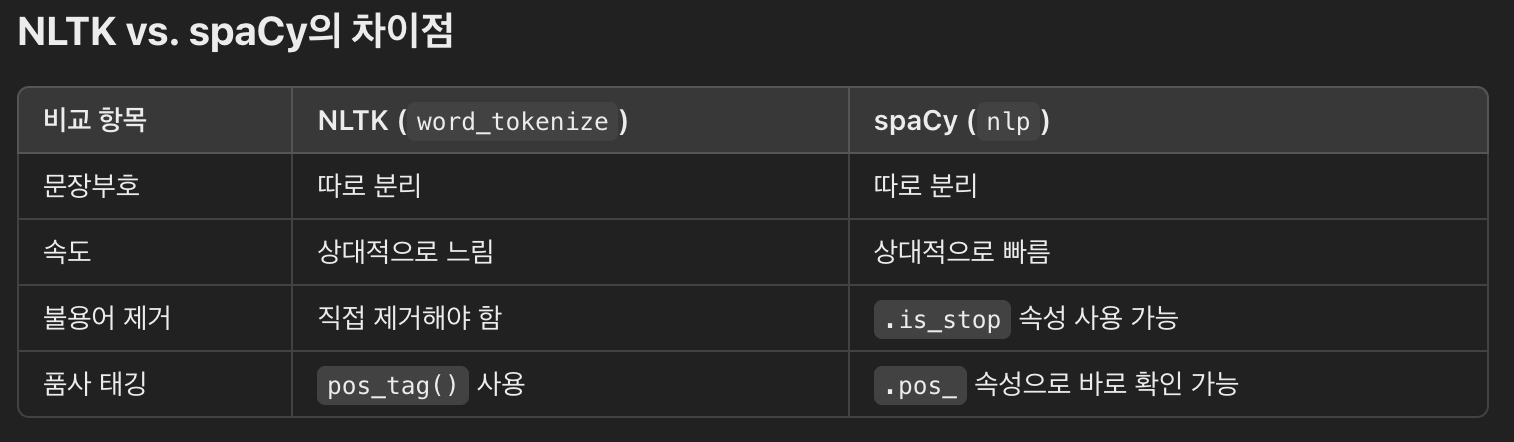

### NLTK를 사용한 단어 빈도 분석 (Word Frequency Distribution)
FreqDist(tokenized_words): 단어 리스트에서 각 단어가 등장한 횟수를 계산.   
fdist.most_common(5): 가장 많이 등장한 단어 5개와 그 빈도수를 출력.

In [6]:
# Import frequency distribution
from nltk.probability import FreqDist

# Find frequency distribution of paragraph
fdist = FreqDist(tokenized_words)

# Check top 5 common words
fdist.most_common(5)

[('of', 4), ('the', 3), ('.', 3), ('Mahal', 2), ('is', 2)]

### NLTK 단어 빈도수 시각화 (Word Frequency Distribution Plot)
fdist.plot(20, cumulative=False):
가장 많이 등장한 상위 20개 단어의 빈도수를 막대 그래프(bar chart) 형태로 출력.   
cumulative=False: 각 단어의 빈도수만 표시(누적 빈도가 아님).   
plt.show(): 그래프를 화면에 표시.

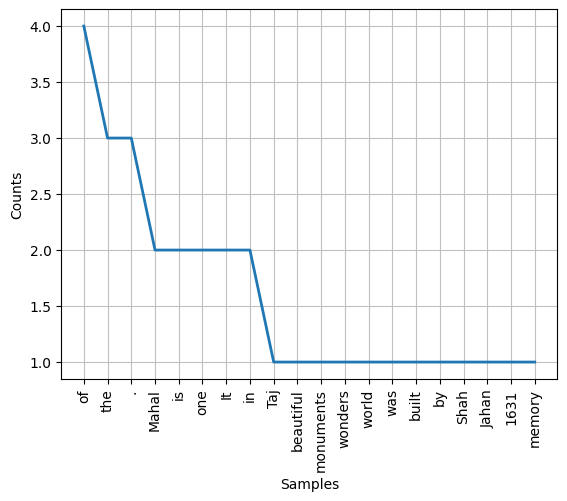

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot Frequency Distribution
fdist.plot(20, cumulative=False)
plt.show()

## Stopwords

그래프에서 의미 있는 단어들만 표시하려면 불용어(stopwords)와 특수문자 제거가 필요함.

### NLTK의 불용어(Stopwords) 리스트 로드
stopwords.words("english"): NLTK에서 영어 불용어 리스트를 불러옴.   
set(stopwords.words("english")): 리스트를 집합(set)으로 변환하여 중복 없는 빠른 검색 가능.   
print(stopwords_set): 불용어 리스트 출력.   

In [8]:
# import the nltk stopwords
from nltk.corpus import stopwords

# Load english stopwords list
stopwords_set=set(stopwords.words("english"))

print(stopwords_set)

{'all', "i'd", 'and', 'in', "i'll", 'me', 'ourselves', 'won', 'above', 'didn', 'herself', 'y', 'doing', "haven't", 'now', 'm', 'ma', 'over', "hasn't", "she's", 'where', 'because', 'but', 'isn', 'further', 'haven', 'themselves', "won't", 'out', 'their', "we'll", "shan't", 'aren', "mightn't", 've', 'my', "you've", 'against', 'he', 'they', 'needn', "needn't", 'had', 'as', 'not', "we're", 'couldn', 'just', "you'll", "didn't", "it'd", "don't", 'have', 'am', 'o', 'why', 'your', 'each', "i'm", 'only', "you're", 'into', 'him', "i've", 'should', "he'd", 'with', 'then', 's', "it's", 'doesn', "weren't", 'few', "they're", 'that', 'shan', 'up', "hadn't", 'this', "he's", 'below', "mustn't", 'from', 'itself', 'whom', 'who', 'd', 'under', 'too', 'i', 'those', 'when', "we've", 'myself', 'some', 'through', 'no', 'for', 'nor', 'a', 'until', 'mustn', "couldn't", 'mightn', 'any', 'once', "she'd", 'to', 'while', 'both', "wasn't", 'which', 'does', 'its', 'so', 'there', "it'll", 'weren', 'than', 'yours', 'did

### 불용어(Stopwords) 제거
filtered_word_list: 불용어를 제거한 단어 리스트.   
tokenized_words: 원래 문장에서 토큰화된 단어 리스트.   
stopwords_set: NLTK에서 제공하는 영어 불용어 리스트.   

**동작 과정**   
tokenized_words 리스트의 각 단어를 순회하며 검사.   
단어가 stopwords_set(불용어 리스트)에 포함되지 않으면 filtered_word_list에 추가.   
최종적으로 불용어를 제외한 단어 리스트를 출력.   

In [9]:
# Removing stopwords from text
filtered_word_list=[]
for word in tokenized_words:
    # filter stopwords
    if word not in stopwords_set:
        filtered_word_list.append(word)

# print tokenized words
print("Tokenized Word List:", tokenized_words)

# print filtered words
print("Filtered Word List:", filtered_word_list)

Tokenized Word List: ['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']
Filtered Word List: ['Taj', 'Mahal', 'one', 'beautiful', 'monuments', '.', 'It', 'one', 'wonders', 'world', '.', 'It', 'built', 'Shah', 'Jahan', '1631', 'memory', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


#### 개선할 점
1. 대소문자 문제 해결: 현재 "It"은 불용어 리스트에 있지만 "it"(소문자)이 아니라서 제거되지 않음.   
이를 해결하려면 모든 단어를 소문자로 변환해야 함.   
2. 특수문자(마침표 .) 제거 -> 특수문자도 함께 제거하려면 .isalnum()을 추가
3. 코드 간결성을 위해 리스트 컴프리헨션 사용

In [10]:
filtered_word_list = [
    word for word in tokenized_words if word.isalnum() and word.lower() not in stopwords_set
    ]

print("Filtered Word List:", filtered_word_list)

Filtered Word List: ['Taj', 'Mahal', 'one', 'beautiful', 'monuments', 'one', 'wonders', 'world', 'built', 'Shah', 'Jahan', '1631', 'memory', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal']


### spaCy를 이용한 불용어(Stopwords) 제거

spacy.load("en_core_web_sm"): 영어 자연어 처리 모델(en_core_web_sm)을 로드.   
nlp(paragraph): 주어진 텍스트(paragraph)를 spaCy의 NLP 객체로 변환.   

token.is_stop:   
해당 단어가 **불용어(stopwords)**인지 확인.   
is_stop == False인 경우, 리스트에 추가.   
최종적으로 불용어를 제거한 단어 리스트를 출력.   


In [11]:
# Loading english language model
nlp = spacy.load("en_core_web_sm")

# text paragraph
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

# Create nlp Object to handle linguistic annotations in a documents.
my_doc = nlp(paragraph)

# Removing stopwords from text
filtered_token_list=[]
for token in my_doc:
    # filter stopwords
    if token.is_stop==False:
        filtered_token_list.append(token)

print("Filtered Word List:",filtered_token_list)

Filtered Word List: [Taj, Mahal, beautiful, monuments, ., wonders, world, ., built, Shah, Jahan, 1631, memory, beloved, wife, Mumtaj, Mahal, .]


## Stemming and Lemmatization

### **어간 추출(Stemming)**과 **표제어 추출(Lemmatization)**을 비교

1. 표제어 추출 (Lemmatization)
WordNetLemmatizer().lemmatize(word, pos)   
word: 처리할 단어   
pos: 품사(동사 "v"로 지정)   
표제어 추출은 단어를 **사전에 존재하는 기본형(lemma)**으로 변환.   
crying → cry   
2. 어간 추출 (Stemming)
PorterStemmer().stem(word)   
규칙 기반으로 단어의 어미를 단순히 잘라서 변형.   
crying → cri   

In [12]:
# Import Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer

# Create lemmatizer object
lemmatizer = WordNetLemmatizer()

# Import Porter Stemmer
from nltk.stem.porter import PorterStemmer

# Create stemmer object
stemmer = PorterStemmer()

# take a sample word
sample_word = "crying"

print("Lemmatized Sample Word:", lemmatizer.lemmatize(sample_word,"v"))

print("Stemmed Sample Word:", stemmer.stem(sample_word))

Lemmatized Sample Word: cry
Stemmed Sample Word: cri


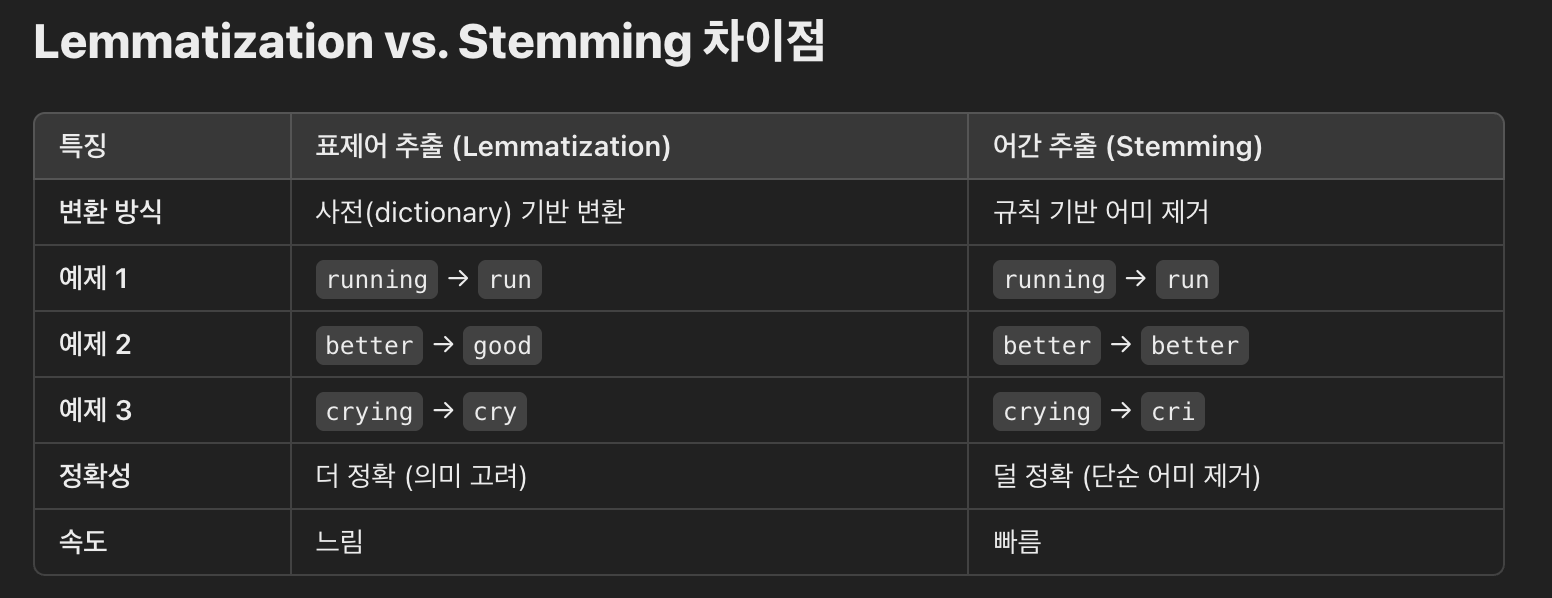

### spaCy를 이용한 표제어 추출(Lemmatization)

spacy.load("en_core_web_sm"): 영어 자연어 처리 모델(en_core_web_sm)을 로드.   
nlp("cry cries crying"): 단어를 spaCy의 NLP 객체로 변환.   
.lemma_: spaCy가 분석한 단어의 **표제어(기본형)**를 출력.   

In [13]:
# Loading english language model
nlp = spacy.load("en_core_web_sm")

# Create nlp Object to handle linguistic annotations in documents.
words = nlp("cry cries crying")

# Find lemmatized word
for w in words:
    print('Original Word: ', w.text)
    print('Lemmatized Word: ',w.lemma_)

Original Word:  cry
Lemmatized Word:  cry
Original Word:  cries
Lemmatized Word:  cry
Original Word:  crying
Lemmatized Word:  cry


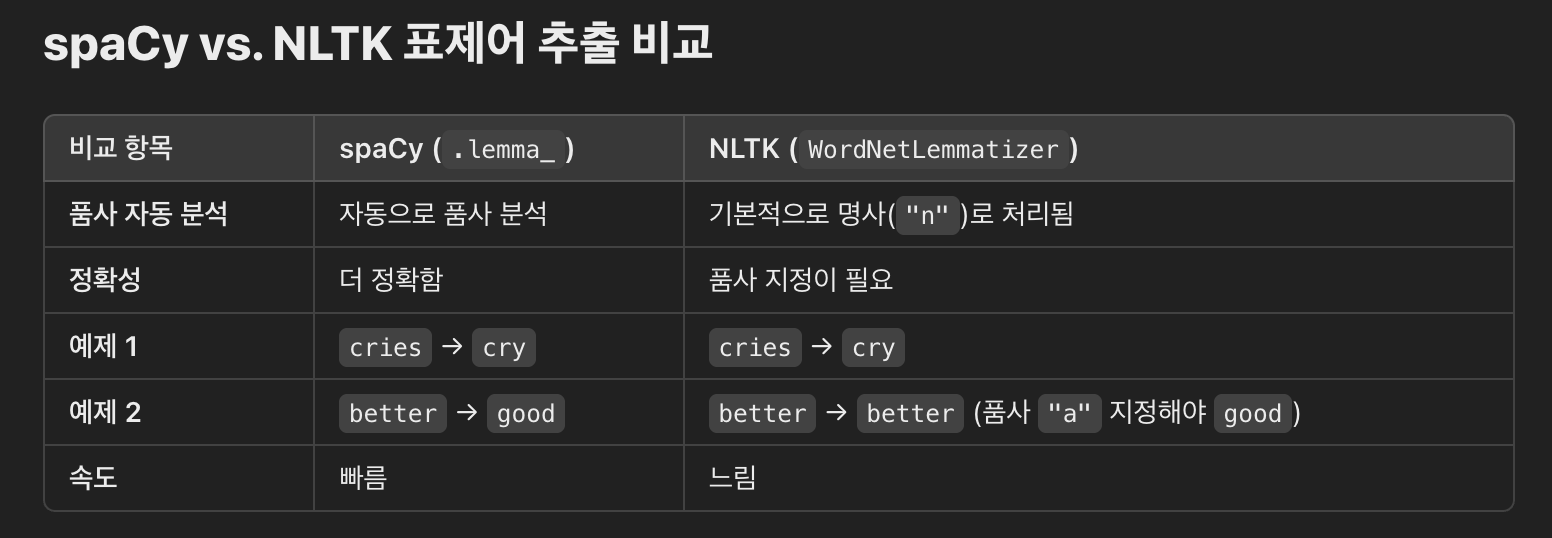

## PoS Tagging

### NLTK를 이용한 토큰화(Tokenization)와 품사 태깅(Part-of-Speech Tagging)
word_tokenize(sentence): 주어진 문장을 단어 단위로 토큰화.   
pos_tag(sent_tokens): 토큰화된 단어들에 대해 품사 태깅을 수행.   
품사 태깅(Part-of-Speech tagging)은 각 단어에 대해 그 단어가 명사, 동사, 형용사 등 어떤 품사에 속하는지 태그를 붙이는 과정.   
출력: 각 단어에 대해 (단어, 품사) 형태로 출력.   
#### 품사 태그 종류 (예시):
**명사:**

'NN': 단수 명사 (cat)   
'NNS': 복수 명사 (cats)   
'NNP': 고유 명사 (New York)   
'NNPS': 복수 고유 명사 (Smiths)   
**동사:**

'VB': 기본형 동사 (run)   
'VBD': 과거형 동사 (ran)   
'VBG': 현재분사형 (running)   
'VBZ': 3인칭 단수 현재형 (runs)   
**형용사:**

'JJ': 형용사 (beautiful)   
'JJR': 비교급 (more beautiful)   
'JJS': 최상급 (most beautiful)   

In [14]:
# import Word Tokenizer and Pos Tagger
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Sample sentence
sentence = "Taj Mahal is one of the beautiful monument."

# Tokenize the sentence
sent_tokens = word_tokenize(sentence)

# Create PoS tags
sent_pos = pos_tag(sent_tokens)

# Print tokens with PoS
print(sent_pos)

[('Taj', 'NNP'), ('Mahal', 'NNP'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('beautiful', 'JJ'), ('monument', 'NN'), ('.', '.')]


### spaCy를 이용한 품사 태깅(Part-of-Speech Tagging)
spacy.load("en_core_web_sm"): spaCy의 소형 영어 모델을 로드.   
nlp(u"Taj Mahal is one of the beautiful monument."): 주어진 문장을 spaCy의 NLP 객체로 변환하여 언어적 주석을 추가.   
for token in sentence:: 문장에서 각 토큰에 대해 반복문을 실행.   
token.text: 토큰의 원본 단어.   
token.pos_: 해당 단어의 품사 (Part-of-Speech) 태그.   
spaCy는 문장을 정확하게 품사 태깅을 하며, 그 결과를 직관적인 방식으로 제공합니다. 각 품사는 문법적 역할에 따라 고유한 태그를 갖고 있습니다.

**품사 태그 종류 (spaCy)**   
주요 POS 태그 목록
	•	NOUN: 명사 (예: dog, car, idea)   
	•	PROPN: 고유 명사 (예: John, London)   
	•	VERB: 동사 (예: run, eat, think)   
	•	ADJ: 형용사 (예: beautiful, quick)   
	•	ADV: 부사 (예: quickly, very)   
	•	PRON: 대명사 (예: he, they)   
	•	DET: 한정사 (예: the, a)   
	•	ADP: 전치사/접속사 (예: in, on, of)   
	•	CONJ: 접속사 (예: and, but)   
	•	CCONJ: 등위 접속사 (예: or, and)   
	•	SCONJ: 종속 접속사 (예: because, if)   
	•	AUX: 조동사 (예: is, have)   
	•	NUM: 숫자 (예: one, two)   
	•	PUNCT: 구두점 (예: ,, ./)   
	•	SYM: 기호 (예: , $, %)   
	•	X: 기타 분류 불가 항목   
	•	SPACE: 공백 문자   

In [15]:
# Loading small english language model
nlp = spacy.load("en_core_web_sm")

# Create nlp Object to handle linguistic annotations in a documents.
sentence = nlp(u"Taj Mahal is one of the beautiful monument.")

for token in sentence:
    print(token.text, token.pos_)

Taj PROPN
Mahal PROPN
is AUX
one NUM
of ADP
the DET
beautiful ADJ
monument NOUN
. PUNCT


## Entity Recognition

In [16]:
# Load English model for tokenizer, tagger, parser, and NER
nlp = spacy.load('en_core_web_sm')

# Sample paragraph
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

# Create nlp Object to handle linguistic annotations in documents.
docs=nlp(paragraph)

entities=[(i.text, i.label_) for i in docs.ents]
print(entities)

[('Taj Mahal', 'PERSON'), ('one', 'CARDINAL'), ('Shah Jahan', 'PERSON'), ('1631', 'DATE'), ('third', 'ORDINAL'), ('Mumtaj Mahal', 'ORG')]


In [17]:
# Import display for visualizing the Entities
from spacy import displacy
 # Visualize the entities using render function
displacy.render(docs, style = "ent",jupyter = True)

## Dependency Parsing

In [18]:
# Load English model for tokenizer, tagger, parser, and NER
nlp = spacy.load('en_core_web_sm')

# Sample sentence
sentence="Taj Mahal is one of the beautiful monument."

# Create nlp Object to handle linguistic annotations in a documents.
docs=nlp(sentence)

# Visualize the  using render function
displacy.render(docs, style="dep", jupyter= True, options={'distance': 150})

## WordCloud

1. from wordcloud import WordCloud, STOPWORDS: WordCloud와 기본 불용어 리스트인 STOPWORDS를 가져옵니다.
2. import matplotlib.pyplot as plt: matplotlib 라이브러리를 사용하여 시각화할 준비를 합니다.
3. stopword_list = set(STOPWORDS): 불용어(stopwords) 리스트를 가져와 집합 형태로 변환하여 불용어를 제외할 수 있도록 합니다.
4. paragraph: 워드 클라우드 생성을 위한 샘플 문단입니다.
5. WordCloud(...).generate(paragraph): WordCloud 객체를 생성하여 주어진 문단에 대해 워드 클라우드를 생성합니다.
  - width와 height: 출력 이미지의 크기.
  - background_color: 배경색 (여기서는 흰색).
  - stopwords: 불용어를 제외하는 데 사용됩니다.
  - min_font_size: 최소 글자 크기 설정.
6. plt.figure(figsize=(8, 6)): 이미지 크기 설정.
7. plt.imshow(word_cloud): 워드 클라우드를 화면에 표시합니다.
8. plt.axis("off"): 축을 제거하여 클라우드를 깨끗하게 보이도록 합니다.
9. plt.show(): 최종적으로 화면에 시각화를 출력합니다.

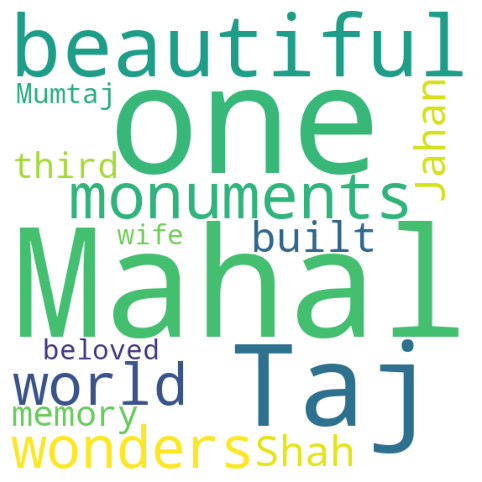

In [19]:
# importing all necessary modules
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

stopword_list = set(STOPWORDS)

paragraph="""Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

word_cloud = WordCloud(width = 550, height = 550,
                       background_color ='white',
                       stopwords = stopword_list,
                       min_font_size = 10).generate(paragraph)

# Visualize the WordCloud Plot

# Set wordcloud figure size
plt.figure(figsize = (8, 6))
# Show image
plt.imshow(word_cloud)
# Remove Axis
plt.axis("off")
# show plot
plt.show()

## Sentiment Analysis using Text Classification (감정분석)
BoW에 기반한 text classification을 통해 감정분석을 해보자.   
**순서**
1. Load the dataset
2. Explore the dataset.
3. Generating features using CountVectorizer.
4. Split train and test set.
5. Classification Model Building using Logistic Regression.
6. Evaluate the Classification Model.

### Classification using Bag of Words (or TF)
#### 1. Load the Dataset
Amazon Alexa 리뷰 데이터셋을 불러와서 상위 5개의 레코드를 확인
1. import pandas as pd: pandas 라이브러리를 불러옵니다. 이 라이브러리는 데이터 분석을 위한 다양한 기능을 제공합니다.

2. copus_url: Amazon Alexa 리뷰 데이터셋의 URL을 변수에 저장합니다. 이 데이터셋은 **탭 구분(\t)**으로 되어 있는 TSV(탭으로 구분된 값) 파일입니다.

3. df = pd.read_csv(copus_url, sep='\t'):

  - read_csv 함수는 CSV/TSV 파일을 읽는 함수입니다.
  - sep='\t': 탭 구분으로 파일을 읽습니다. 즉, 각 열이 탭으로 구분된 데이터셋을 처리합니다.

4. df.tail(): tail() 함수는 데이터프레임의 마지막 5개의 행을 출력합니다. head()는 첫 5개를 출력하는 것과 유사하지만, 여기서는 데이터의 마지막 5개를 확인하려는 것입니다.

In [20]:
# Import libraries
import pandas as pd

# read the dataset
copus_url = 'https://raw.githubusercontent.com/sharmaroshan/Amazon-Alexa-Reviews/master/amazon_alexa.tsv'
df=pd.read_csv(copus_url, sep='\t')

# Show top 5-records
df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


#### 2. Explore the dataset
Seaborn Count Plot - 코드 설명
1. import seaborn as sns: seaborn 라이브러리를 불러옵니다. seaborn은 고급 시각화를 위한 Python 라이브러리로, 데이터의 패턴을 더 쉽게 시각화하는 데 유용합니다.

2. import matplotlib.pyplot as plt: matplotlib 라이브러리에서 **pyplot**을 가져옵니다. pyplot은 다양한 그래프를 그릴 수 있는 기본적인 시각화 도구입니다.

3. sns.countplot(x='feedback', data=df):

  - countplot은 범주형 데이터에 대한 빈도 분포를 시각화하는 데 사용됩니다.
  - x='feedback': feedback 열에 있는 값을 기준으로 각 **범주(예: 긍정적/부정적 리뷰)**의 빈도를 세고, 이를 막대 그래프로 시각화합니다.
  - data=df: 데이터를 df로 지정하여 feedback 컬럼을 기준으로 그래프를 그립니다.

4. plt.xlabel('Sentiment Score'): X축 레이블을 **"Sentiment Score"**로 설정합니다. 이 레이블은 리뷰의 감정 점수를 나타낼 것입니다.

5. plt.ylabel('Number of Records'): Y축 레이블을 **"Number of Records"**로 설정하여 각 감정 점수별로 **몇 개의 레코드(리뷰)**가 있는지 나타냅니다.

6. plt.show(): 시각화를 화면에 표시합니다.

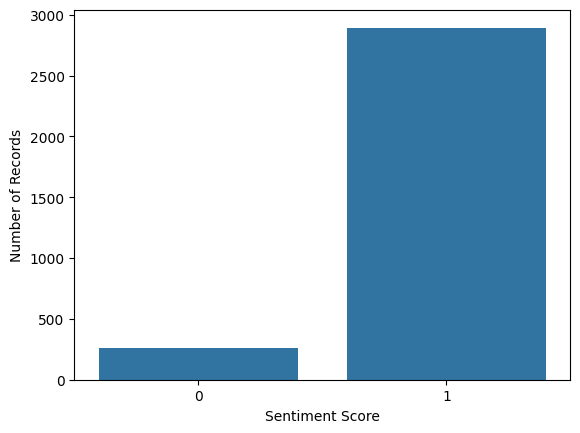

In [21]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot(x='feedback', data=df)

# Set X-axis and Y-axis labels
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Records')

# Show the plot using show() function
plt.show()


#### 3. Feature Generation using CountVectorizer

텍스트데이터 벡터화   
1. from nltk.tokenize import RegexpTokenizer:   
  nltk 라이브러리에서 **RegexpTokenizer**를 가져옵니다. 이 객체는 정규 표현식을 사용하여 텍스트에서 특정 패턴을 토큰화할 수 있습니다.

2. from sklearn.feature_extraction.text import CountVectorizer:
  **CountVectorizer**는 텍스트를 숫자 벡터로 변환하는 방법 중 하나입니다. 이 벡터화 기법은 텍스트에서 단어의 빈도를 계산하여 문서-단어 행렬을 만듭니다.

3. regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+'):   
  - 정규 표현식을 사용하여 텍스트에서 영어 알파벳만 추출하도록 설정합니다.
  - [a-zA-Z]+: 영어 대소문자만을 포함한 단어를 추출하며, 숫자나 특수문자는 제외됩니다.

4. count_vectorizer = CountVectorizer(...):   
  - lowercase=True: 모든 단어를 소문자로 변환하여, 대소문자를 구분하지 않도록 합니다.
  - stop_words='english': 영어 불용어를 자동으로 제거합니다. (예: "the", "is", "and" 등)
  - ngram_range = (1, 1): 단어 단위(unigram)로만 분석합니다. 예를 들어, "good product"는 두 개의 단어로 처리되며, 큰 n-그램을 사용하지 않습니다. (Bigram, Trigram 등을 설정할 수 있음)
  - tokenizer = regex_tokenizer.tokenize: RegexpTokenizer를 tokenizer로 지정하여, 텍스트를 정규 표현식에 맞춰 분할합니다.

5. count_vectors = count_vectorizer.fit_transform(...):

  - fit_transform(): CountVectorizer를 사용하여 문서-단어 행렬을 생성합니다.
  - df['verified_reviews'].values.astype('U'): 데이터프레임에서 verified_reviews 열을 선택하여, 모든 텍스트 데이터를 숫자 벡터로 변환합니다.
    - .values: DataFrame을 넘파이 배열로 변환합니다.
    - .astype('U'): 텍스트 데이터를 유니코드 형식으로 변환합니다. (CountVectorizer는 문자열 처리에 유니코드가 필요합니다.)



이 코드의 주요 목적은 텍스트 데이터(리뷰)를 단어 벡터로 변환하는 것입니다. count_vectors는 각 문서(리뷰)에서 단어의 빈도를 수치화한 행렬로, 각 행은 문서, 각 열은 단어에 해당하는 형태로 만들어집니다. 예를 들어, 첫 번째 열은 "good"이라는 단어가 문서에 몇 번 등장했는지를 나타냅니다.

이 행렬을 사용하면, 각 문서에 포함된 단어들이 어떤 빈도로 나타나는지 파악할 수 있으며, 문서 간 유사성을 계산하거나 주요 키워드를 추출하는 데 유용합니다.


In [22]:
# Import CountVectorizer and RegexTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer


# Create Regex tokenizer for removing special symbols and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

# Initialize CountVectorizer object
count_vectorizer = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = regex_tokenizer.tokenize)

# Fit and transform the dataset
count_vectors = count_vectorizer.fit_transform(df['verified_reviews'].values.astype('U'))

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### 4. Split train and test set (데이터 분할)
**순서**
1. from sklearn.model_selection import train_test_split:   

train_test_split 함수는 **데이터셋을 훈련 세트(training set)**와 **테스트 세트(test set)**로 나누는 데 사용됩니다.   
이 함수는 데이터를 랜덤하게 분할할 수 있으며, 훈련용 데이터와 테스트용 데이터를 효율적으로 나누는 데 유용합니다.

2. train_test_split():   

count_vectors: CountVectorizer로 변환된 단어 빈도 행렬을 입력으로 사용합니다. 이 행렬은 각 리뷰의 텍스트를 숫자 벡터로 변환한 것입니다.   
df['feedback']: **목표 변수(target variable)**로, 각 리뷰의 감정 점수(feedback)(긍정적/부정적)입니다.   
test_size=0.3: 데이터의 30%를 테스트 세트로 분할하고 나머지 70%는 훈련 세트로 사용합니다. 즉, 30%가 테스트에 사용되고, 나머지 70%가 모델 훈련에 사용됩니다.   
random_state=1: 데이터 분할의 랜덤 시드를 설정합니다. 이를 통해 동일한 데이터셋에 대해 항상 동일한 결과를 얻을 수 있습니다. 랜덤 시드를 고정하면 코드 실행 시마다 데이터 분할이 동일하게 이루어집니다.   

3. 결과 변수:

feature_train: 훈련 데이터의 입력 값(특징)을 포함하는 행렬입니다. 여기서는 단어 빈도 벡터입니다.   
feature_test: 테스트 데이터의 입력 값(특징)을 포함하는 행렬입니다.   
target_train: 훈련 데이터의 목표 값(레이블)을 포함합니다. 여기서는 리뷰의 감정 점수입니다.   
target_test: 테스트 데이터의 목표 값(레이블)을 포함합니다.   

In [23]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Partition data into training and testing set
# 중복 코드 삭제함!
feature_train, feature_test, target_train, target_test = train_test_split(
    count_vectors, df['feedback'], test_size=0.3, random_state=1)

#### 5. Classification Model Building using Logistic Regression (로지스틱 회귀 모델 학습 및 예측)
- `from sklearn.linear_model import LogisticRegression`  
  scikit-learn 라이브러리에서 **LogisticRegression** 클래스를 가져온다.  
  로지스틱 회귀(Logistic Regression)는 주로 **이진 분류(Binary Classification)** 문제에서 사용되며, 입력된 데이터를 기반으로 특정 클래스(예: 긍정/부정)를 예측하는 모델이다.  

- `logreg = LogisticRegression(solver='lbfgs')`  
  **LogisticRegression 객체**를 생성한다.  
  - `solver='lbfgs'`: 최적화 알고리즘을 지정하는 옵션으로, **Limited-memory Broyden–Fletcher–Goldfarb–Shanno (L-BFGS)** 방법을 사용한다.  
  - L-BFGS는 작은 데이터셋에서 빠르게 수렴하는 알고리즘으로, 기본값이며 일반적으로 사용된다.  
  - 생성된 `logreg` 객체는 이후 학습 데이터를 입력받아 학습하고, 새로운 데이터에 대한 예측을 수행하는 데 사용된다.  

- `logreg.fit(feature_train, target_train)`  
  **모델을 학습(훈련)** 시키는 과정이다.  
  - `feature_train`: 훈련 데이터셋(입력 데이터)으로, 텍스트 데이터를 수치 벡터로 변환한 값(예: `CountVectorizer`로 변환된 단어 벡터)이다.  
  - `target_train`: 훈련 데이터의 정답(레이블)으로, 감정 분석 예제에서는 **0(부정) 또는 1(긍정)** 값으로 구성된다.  
  - 이 과정에서 모델은 입력 데이터와 정답 값을 바탕으로 **최적의 가중치(weight)를 학습하여 결정 경계(decision boundary)를 생성**한다.  

- `predictions = logreg.predict(feature_test)`  
  학습된 모델을 사용하여 **테스트 데이터(feature_test)에 대한 예측을 수행**한다.  
  - `feature_test`: 새로운 입력 데이터(훈련에 사용되지 않은 데이터)  
  - `predictions`: 예측된 감정 값(0 또는 1)로 이루어진 리스트  
  - 모델이 `feature_test`를 분석한 후, **각 샘플이 0(부정)인지 1(긍정)인지 예측한 결과**를 반환한다.  
  - 이후 `predictions`는 모델 평가(예: 정확도 측정)에 사용될 수 있다.  

In [24]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='lbfgs')

# fit the model with data
logreg.fit(feature_train,target_train)

# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

#### 6. Evaluate the Classification Model

- `from sklearn.metrics import accuracy_score`  
  모델의 **정확도(Accuracy)** 를 평가하는 함수로, 전체 샘플 중에서 올바르게 예측된 샘플의 비율을 계산한다.  

- `from sklearn.metrics import precision_score`  
  모델의 **정밀도(Precision)** 를 평가하는 함수로, **양성(Positive)으로 예측한 샘플 중에서 실제 양성인 샘플의 비율**을 계산한다.  
  - 정밀도가 높으면 **잘못된 양성(False Positive, FP)이 적다**는 의미이다.  

- `from sklearn.metrics import recall_score`  
  모델의 **재현율(Recall)** 을 평가하는 함수로, **실제 양성 샘플 중에서 올바르게 예측된 비율**을 계산한다.  
  - 재현율이 높으면 **잘못된 음성(False Negative, FN)이 적다**는 의미이다.  

- `from sklearn.metrics import f1_score`  
  **F1-스코어(F1-Score)** 를 계산하는 함수로, 정밀도와 재현율의 조화평균을 나타낸다.  
  - 정밀도와 재현율 간의 균형을 평가하는 지표로 활용된다.  

- `print("Logistic Regression Model Accuracy:", accuracy_score(target_test, predictions))`  
  - `accuracy_score(target_test, predictions)`: **모델의 정확도**를 계산하여 출력한다.  
  - 정확도 = (올바르게 예측한 샘플 개수) / (전체 샘플 개수)  

- `print("Logistic Regression Model Precision:", precision_score(target_test, predictions))`  
  - `precision_score(target_test, predictions)`: **모델의 정밀도(Precision)** 를 계산하여 출력한다.  
  - Precision = TP / (TP + FP)  

- `print("Logistic Regression Model Recall:", recall_score(target_test, predictions))`  
  - `recall_score(target_test, predictions)`: **모델의 재현율(Recall)** 을 계산하여 출력한다.  
  - Recall = TP / (TP + FN)  

- `print("Logistic Regression Model F1-Score:", f1_score(target_test, predictions))`  
  - `f1_score(target_test, predictions)`: **모델의 F1-스코어**를 계산하여 출력한다.  
  - F1-Score = 2 × (Precision × Recall) / (Precision + Recall)  
  - F1-Score는 Precision과 Recall이 균형을 이루는지 확인하는 데 유용하다.

In [25]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Assess model performance using accuracy measure
print("Logistic Regression Model Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Logistic Regression Model Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Logistic Regression Model Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("Logistic Regression Model F1-Score:",f1_score(target_test, predictions))

Logistic Regression Model Accuracy: 0.9428571428571428
Logistic Regression Model Precision: 0.952433628318584
Logistic Regression Model Recall: 0.9873853211009175
Logistic Regression Model F1-Score: 0.9695945945945946


### Classification using TF-IDF
TF-IDF에 기반한 text classification을 통해 감정분석을 해보자.   
**순서**
1. Load the dataset (이전에 완료)
2. Explore the dataset. (이전에 완료)
---------------------------
3. Generating features using TfidfVectorizer.
4. Split train and test set.
5. Classification Model Building using Logistic Regression.
6. Evaluate the Classification Model.

#### 3. Generating features using TfidfVectorizer.   
- `RegexpTokenizer(r'[a-zA-Z]+')`는 정규 표현식을 사용하여 텍스트에서 알파벳으로 이루어진 단어만 추출하며, 숫자 및 특수문자를 제거한다.  
- `TfidfVectorizer`는 텍스트 데이터를 TF-IDF(Term Frequency-Inverse Document Frequency) 방식으로 벡터화하는 도구이다.  
- `lowercase=True`는 모든 단어를 소문자로 변환하여 일관성을 유지한다.  
- `stop_words='english'`는 영어 불용어(stopwords)를 제거하여 의미 있는 단어만 학습에 사용하도록 한다.  
- `ngram_range=(1,1)`은 unigram(단일 단어)만을 고려하여 단어 빈도를 계산하도록 설정한다.  
- `tokenizer=regex_tokenizer.tokenize`는 앞에서 정의한 `RegexpTokenizer`를 사용하여 텍스트를 단어 단위로 토큰화한다.  
- `fit_transform(df['verified_reviews'].values.astype('U'))`는 텍스트 데이터를 TF-IDF 방식으로 변환하며, `.values.astype('U')`는 문자열 형식으로 변환하여 벡터화 과정에서 발생할 수 있는 데이터 타입 문제를 방지한다.  
- 최종적으로 `text_tfidf` 변수에는 리뷰 텍스트가 TF-IDF 방식으로 변환된 희소 행렬(Sparse Matrix) 형태로 저장된다.

In [26]:
# Import TfidfVectorizer and RegexTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create Regex tokenizer for removing special symbols and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

# Initialize TfidfVectorizer object
tfidf = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = regex_tokenizer.tokenize)

# Fit and transform the dataset
text_tfidf= tfidf.fit_transform(df['verified_reviews'].values.astype('U'))

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


4. Split train and test set.
- `train_test_split` 함수는 데이터를 학습용(train)과 테스트용(test)으로 분할하는 역할을 한다.  
- `text_tfidf`는 **TF-IDF 방식으로 변환된 리뷰 데이터**로, 모델의 입력(feature) 데이터가 된다.  
- `df['feedback']`은 **레이블 데이터**로, 긍정(1) 또는 부정(0)의 감정 분석 결과를 나타낸다.  
- `test_size=0.3`은 전체 데이터의 **30%를 테스트 데이터로 할당**하고, 나머지 70%를 학습 데이터로 사용하도록 설정한다.  
- `random_state=1`은 **재현성을 보장**하기 위해 난수 시드를 고정하는 역할을 한다.  
- 최종적으로,  
  - `feature_train`과 `feature_test`는 각각 학습 및 테스트 데이터의 **입력 데이터(TF-IDF 벡터)**  
  - `target_train`과 `target_test`는 각각 학습 및 테스트 데이터의 **정답 레이블(긍·부정 감정 값)**을 의미한다.

In [27]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Partition data into training and testing set
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(
    text_tfidf, df['feedback'], test_size=0.3, random_state=1)

5. Classification Model Building using Logistic Regression.
- `LogisticRegression(solver='lbfgs')`는 **로지스틱 회귀 모델**을 생성한다. 여기서 `solver='lbfgs'`는 최적화 알고리즘으로 **L-BFGS** (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)를 사용하여 모델을 학습한다. L-BFGS는 메모리 효율이 좋은 최적화 방법으로, 큰 데이터셋에 적합하다.  
- `logreg.fit(feature_train, target_train)`은 학습 데이터를 사용하여 **로지스틱 회귀 모델을 훈련**시킨다. `feature_train`은 학습용 피처 데이터, `target_train`은 학습용 레이블 데이터를 의미한다.  
- `logreg.predict(feature_test)`는 **테스트 데이터**(`feature_test`)에 대해 **예측값을 계산**하여 `predictions` 변수에 저장한다. 이 예측값은 각 리뷰에 대해 **긍정(1) 또는 부정(0)** 감정을 예측한 결과이다.

In [28]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='lbfgs')

# fit the model with data
logreg.fit(feature_train,target_train)

# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

6. Evaluate the Classification Model.
- `accuracy_score(target_test, predictions)`는 **정확도(Accuracy)**를 계산한다. 이는 예측한 값이 실제 값과 일치하는 비율로, 모델이 얼마나 정확하게 예측했는지를 나타낸다.  
- `precision_score(target_test, predictions)`는 **정밀도(Precision)**를 계산한다. 이는 모델이 예측한 긍정 클래스 중 실제로 긍정인 비율로, False Positive를 얼마나 잘 피했는지를 측정한다.  
- `recall_score(target_test, predictions)`는 **재현율(Recall)**을 계산한다. 이는 실제로 긍정 클래스인 것 중에서 모델이 긍정으로 올바르게 예측한 비율로, False Negative를 얼마나 잘 피했는지를 측정한다.  
- `f1_score(target_test, predictions)`는 **F1 점수(F1-Score)**를 계산한다. 이는 정밀도와 재현율의 조화 평균으로, 두 지표의 균형을 잘 맞춘 성능 평가 지표이다. F1 점수가 높을수록 모델이 긍정 클래스 예측에서 잘 수행한 것이다.

In [29]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Assess model performance using accuracy measure
print("Logistic Regression Model Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Logistic Regression Model Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Logistic Regression Model Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("Logistic Regression Model F1-Score:",f1_score(target_test, predictions))

Logistic Regression Model Accuracy: 0.9248677248677248
Logistic Regression Model Precision: 0.9247083775185578
Logistic Regression Model Recall: 1.0
Logistic Regression Model F1-Score: 0.9608815426997245


## Text Similarity

In [30]:
def jaccard_similarity(sent1, sent2):
    """Find text similarity using jaccard similarity"""

    # Tokenize sentences
    token1 = set(sent1.split())
    token2 = set(sent2.split())

    # intersection between tokens of two sentences
    intersection_tokens = token1.intersection(token2)

    # Union between tokens of two sentences
    union_tokens=token1.union(token2)

    # Cosine Similarity
    sim_= float(len(intersection_tokens) / len(union_tokens))
    return sim_

# Call function
jaccard_similarity('I love pets.','I hate pets.')

0.5

In [31]:
# Let's import text feature extraction TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

docs=['I love pets.','I hate pets.']

# Initialize TfidfVectorizer object
tfidf= TfidfVectorizer()

# Fit and transform the given data
tfidf_vector = tfidf.fit_transform(docs)

# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity

# compute similarity using cosine similarity
cos_sim=cosine_similarity(tfidf_vector[0], tfidf_vector[1])
print(cos_sim)

[[0.33609693]]


In [32]:
# Load English model for tokenizer, tagger, parser, and NER
nlp = spacy.load('en_core_web_sm')

# Create documents 123123123
doc1 = nlp(u'I love pets.')
doc2 = nlp(u'I hate pets')

# Find similarity
print(doc1.similarity(doc2))

0.7636756300926208


<ipython-input-32-3d21f1b822d5>:9: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(doc1.similarity(doc2))


In [33]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 1.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [34]:
# Import spacy
import spacy

# Load English model for tokenizer, tagger, parser, and NER
nlp = spacy.load('en_core_web_lg')

# Create documents
doc1 = nlp(u'I love pets.')
doc2 = nlp(u'I hate pets')

# Find similarity
print(doc1.similarity(doc2))

0.9082661867141724




---


# [Assignment 1] Sentiment Analysis!
Try Sentiment Analysis by following suggenstions.
- Use Other dataset: [dataset list](https://research.aimultiple.com/sentiment-analysis-dataset/)
- Change your classifier: Other than `Logistic Regression`. [ref](https://www.kaggle.com/code/jeffd23/10-classifier-showdown-in-scikit-learn)
- Additional preprocessing: n-gram, stopwords [ref](https://towardsdatascience.com/nlp-preprocessing-with-nltk-3c04ee00edc0)

Will grade it only on and off. But briefly tell us what did you try.
-
-
-

#### Load the Dataset

In [35]:
# Import libraries
import pandas as pd

# read the dataset
copus_url = 'https://raw.githubusercontent.com/sharmaroshan/Amazon-Alexa-Reviews/master/amazon_alexa.tsv'
df=pd.read_csv(copus_url, sep='\t')

# Show top 5-records
df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


#### Explore the dataset

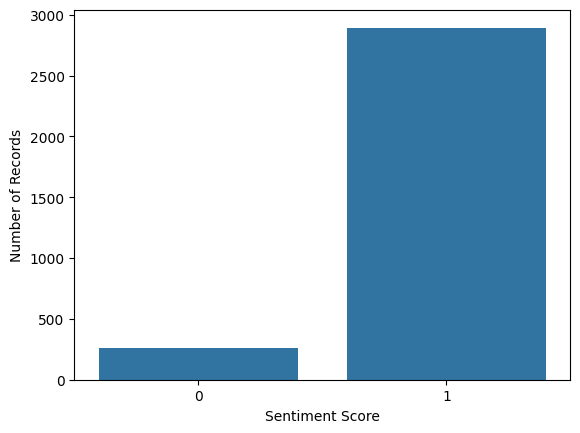

In [36]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot(x='feedback', data=df)

# Set X-axis and Y-axis labels
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Records')

# Show the plot using show() function
plt.show()


#### Feature Generation
변경 사항:
ngram_range=(2, 2)로 설정하여 Bigram만을 고려합니다. 즉, 두 단어가 함께 나타나는 패턴을 분석하게 됩니다.

In [37]:
# Import CountVectorizer and RegexTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

# Create Regex tokenizer for removing special symbols and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

# Initialize CountVectorizer object for Bigram analysis
count_vectorizer = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (2, 2),  # Change from unigram to bigram
                     tokenizer = regex_tokenizer.tokenize)

# Fit and transform the dataset
count_vectors = count_vectorizer.fit_transform(df['verified_reviews'].values.astype('U'))


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### Split train and test set

In [38]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Partition data into training and testing set
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(
    count_vectors, df['feedback'], test_size=0.3, random_state=1)

#### Classification Model Building using Any Machine Learning Model
변경 사항:   
SVC(kernel='linear')는 선형 커널을 사용하는 서포트 벡터 머신(SVM) 모델입니다.   
svm.fit(feature_train, target_train)은 학습 데이터를 사용하여 모델을 훈련시킵니다.   
svm.predict(feature_test)는 테스트 데이터를 사용하여 예측을 수행합니다.   

In [39]:
# Import Support Vector Classifier (SVC)
from sklearn.svm import SVC

# Instantiate the SVM model
svm = SVC(kernel='linear')  # Linear kernel을 사용

# Fit the model with data
svm.fit(feature_train, target_train)

# Forecast the target variable for given test dataset
predictions = svm.predict(feature_test)

#### Evaluate the Classification Model

In [40]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Assess model performance using accuracy measure
print("SVM Model Accuracy:", accuracy_score(target_test, predictions))
# Calculate model precision
print("SVM Model Precision:", precision_score(target_test, predictions))
# Calculate model recall
print("SVM Model Recall:", recall_score(target_test, predictions))
# Calculate model f1 score
print("SVM Model F1-Score:", f1_score(target_test, predictions))

SVM Model Accuracy: 0.9386243386243386
SVM Model Precision: 0.9433551198257081
SVM Model Recall: 0.9931192660550459
SVM Model F1-Score: 0.9675977653631285


### **비교 및 분석**:
1. **정확도 (Accuracy)**: 두 모델은 모두 비슷한 정확도를 보입니다. 로지스틱 회귀가 약간 높은 정확도(0.943)를 기록했지만, 차이는 미미합니다.
   
2. **정밀도 (Precision)**: 로지스틱 회귀 모델이 SVM보다 약간 더 높은 정밀도(0.952) 값을 기록했습니다. 이는 로지스틱 회귀가 긍정 클래스로 예측한 값 중 실제로 긍정인 데이터가 더 많다는 것을 의미합니다.

3. **재현율 (Recall)**: SVM 모델이 더 높은 재현율(0.993)을 기록했습니다. Bigram 모델이 **정밀도 (Precision)**보다는 **재현율 (Recall)**에서 개선된 것은 긍정적인 텍스트를 더 많이 포착할 수 있었다는 의미입니다.
따라서, Bigram 모델로의 변경은 의미가 있었고, 감정 분석에서 긍정적인 문맥을 더 잘 반영한 결과를 보여준 것입니다.

4. **F1-Score**: 로지스틱 회귀 모델의 F1-Score(0.970)가 SVM 모델의 F1-Score(0.968)보다 약간 높은 값을 보입니다. 그러나 차이는 매우 미미하며, 두 모델 모두 상당히 높은 성능을 보입니다.

### 결론:
- 두 모델 모두 **F1-Score**에서 매우 높은 값을 기록하며, **실용적인 측면에서 큰 차이가 없을 수 있습니다**.
만약 정확도보다는 감정의 정확한 분류 (즉, 긍정과 부정을 제대로 구분하는 것)에 중점을 둔다면, Bigram 모델을 사용하는 것이 더 효과적일 수 있습니다.